In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

In [2]:
data = pd.read_csv('marketplace.csv', sep=',', index_col=0)
data.shape

(26014, 15)

In [3]:
dup = data.duplicated()
print(dup.sum())
data[dup]

2220


,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
date,,,,,,,,,,,,,,,
4/25/2020,oppo A9 2020 ram 8/128gb garansi resmi,E5,12.0,RM,Oppo A9,Kota Administrasi Jakarta Utara,False,4100000,999959,0,0,1,98,29,45
4/19/2020,[NEW] Oppo A9 2020 8/128 GB Garansi Resmi RAM ...,E7,16.0,RM,Oppo A9,Kota Administrasi Jakarta Barat,False,3575000,840,0,0,14,94,119,261
4/26/2020,hp Oppo a9 2020,F5,17.0,RM,Oppo A9,Kota Administrasi Jakarta Barat,False,4000000,9925,0,0,3,100,32,75
4/28/2020,Oppo F3 Ram 4gb Rom 64gb Garansi Resmi,A2,10.0,RM,Oppo F3,Kota Tangerang Selatan,False,3199000,999999,0,0,2,94,56,91
4/29/2020,Oppo F3 Ram 4gb Rom 64gb Garansi Resmi,A2,10.0,RM,Oppo F3,Kota Tangerang Selatan,False,3199000,999999,0,0,2,94,56,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/17/2020,XIAOMI REDMI NOTE 7 RAM 4GB INTERNAL 64GB 4/64...,D2319,829.0,OS,Xiaomi Redmi Note 7,Kota Administrasi Jakarta Barat,False,2650000,7,0,0,6,99,91,141
4/4/2020,XIAOMI REDMI NOTE 8 Pro NOTE8 6GB 128GB 6 128 ...,F339,4239.0,OS,Xiaomi Redmi Note 6 Pro,Kota Administrasi Jakarta Barat,False,3699000,76,0,0,11,100,8,24
4/7/2020,Asus Zenfone 3 Max ZC520TL - 4G LTE - 2GB/32GB...,A287,843.0,OS,Asus Zenfone 3 Max ZC520TL,Kota Administrasi Jakarta Pusat,False,1580000,7,0,0,25,100,6,8


In [4]:
dup = data.drop_duplicates()
dup

,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
date,,,,,,,,,,,,,,,
3/11/2020,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
3/26/2020,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000,5,0,0,0,0,0,2
3/23/2020,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3.0,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900,16,0,0,0,96,12,19
4/29/2020,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4.0,OS,Huawei nova 5T,Kota Surabaya,False,4698500,5,0,0,0,99,42,63
4/15/2020,nokia 3310 reborn,C1,5.0,RM,Nokia 1,Kab. Bangkalan,True,1000000,999999,0,0,3,100,18,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/27/2020,Asus Zenfone Max Pro M1 - ZB602KL - 4GB/64GB -...,B311,813.0,OS,Asus Zenfone Max Pro (M1) ZB601KL/ZB602K,Kota Administrasi Jakarta Timur,False,2300000,5,0,0,34,96,99,262
4/8/2020,Asus Zenfone Max Pro M1 Ram 6/64GB Garansi Res...,E417,828.0,OS,Asus Zenfone Max Pro (M1) ZB601KL/ZB602K,Kota Administrasi Jakarta Pusat,False,2045000,9,4090000,2,65,98,16,29
4/2/2020,Asus Zenfone Max Pro M1 ZB602KL 3/32 GARANSI R...,B676,809.0,OS,Asus Zenfone Max Pro (M1) ZB601KL/ZB602K,Kota Administrasi Jakarta Pusat,False,1550000,5,0,0,694,98,123,393


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26014 entries, 3/11/2020 to 4/11/2020
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sku_name        26014 non-null  object 
 1   product_id      26014 non-null  object 
 2   merchant_code   26007 non-null  float64
 3   merchant_badge  26014 non-null  object 
 4   product_type    26014 non-null  object 
 5   merchant_city   26014 non-null  object 
 6   cod             26014 non-null  bool   
 7   price           26014 non-null  int64  
 8   stock           26014 non-null  int64  
 9   daily_gmv       26014 non-null  int64  
 10  daily_sold      26014 non-null  int64  
 11  daily_view      26014 non-null  int64  
 12  rating          26014 non-null  int64  
 13  total_review    26014 non-null  int64  
 14  total_sold      26014 non-null  int64  
dtypes: bool(1), float64(1), int64(8), object(5)
memory usage: 3.0+ MB


In [6]:
data[['merchant_code']]=data[['merchant_code']].astype('Int64')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26014 entries, 3/11/2020 to 4/11/2020
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sku_name        26014 non-null  object
 1   product_id      26014 non-null  object
 2   merchant_code   26007 non-null  Int64 
 3   merchant_badge  26014 non-null  object
 4   product_type    26014 non-null  object
 5   merchant_city   26014 non-null  object
 6   cod             26014 non-null  bool  
 7   price           26014 non-null  int64 
 8   stock           26014 non-null  int64 
 9   daily_gmv       26014 non-null  int64 
 10  daily_sold      26014 non-null  int64 
 11  daily_view      26014 non-null  int64 
 12  rating          26014 non-null  int64 
 13  total_review    26014 non-null  int64 
 14  total_sold      26014 non-null  int64 
dtypes: Int64(1), bool(1), int64(8), object(5)
memory usage: 3.0+ MB


In [7]:
data.isnull().sum()

sku_name          0
product_id        0
merchant_code     7
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

In [11]:
data["merchant_code"]=data["merchant_code"].fillna(0)

In [12]:
data.isnull().sum()

sku_name          0
product_id        0
merchant_code     0
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

In [13]:
data['product_type'].value_counts()

Realme 6                 2161
Samsung Galaxy A10s      1062
Xiaomi Redmi Note 8      1025
Xiaomi Redmi 7A           860
Xiaomi Redmi 6A           747
                         ... 
Infinix Note 4              1
Samsung Galaxy Fold         1
vivo Y21                    1
Samsung Galaxy Z Flip       1
Huawei nova 4               1
Name: product_type, Length: 361, dtype: int64

<AxesSubplot:xlabel='product_type'>

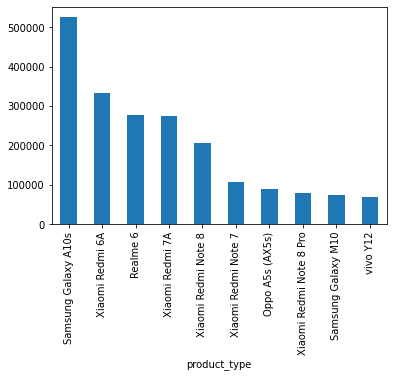

In [14]:
data.groupby("product_type")['total_sold'].sum().sort_values(ascending=False).head(10).plot(kind="bar")

<AxesSubplot:ylabel='Frequency'>

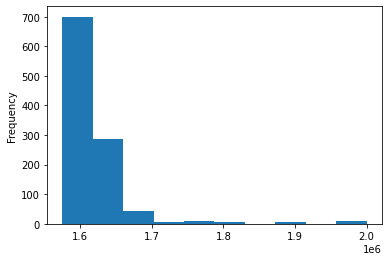

In [26]:
data[data["product_type"]=="Samsung Galaxy A10s"]["price"].plot(kind="hist")

C:\Users\julius-745\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

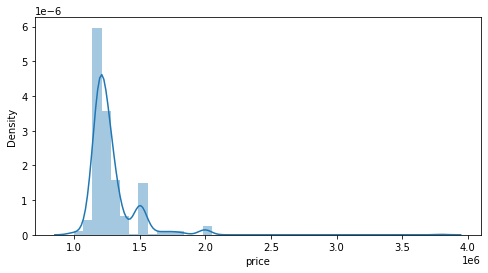

In [20]:
plt.figure(figsize=(8, 4))
sns.distplot(data[data["product_type"]=="Xiaomi Redmi 6A"]["price"], bins=40)

In [21]:
df=data.groupby("product_type")['price'].mean().sort_values(ascending=False)
print(df.loc[["Xiaomi Redmi 6A"]])

product_type
Xiaomi Redmi 6A    1.281875e+06
Name: price, dtype: float64


<AxesSubplot:xlabel='merchant_city'>

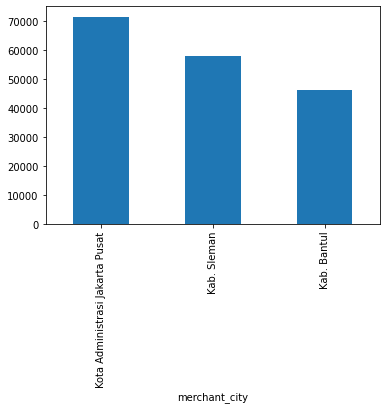

In [27]:
a=data[data["product_type"]=="Samsung Galaxy A10s"]
a.groupby("merchant_city")['total_sold'].sum().sort_values(ascending=False).head(3).plot(kind="bar")

In [28]:
a.groupby("merchant_city")['total_sold'].sum().sort_values(ascending=False).head(3)

merchant_city
Kota Administrasi Jakarta Pusat    71373
Kab. Sleman                        57790
Kab. Bantul                        46091
Name: total_sold, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


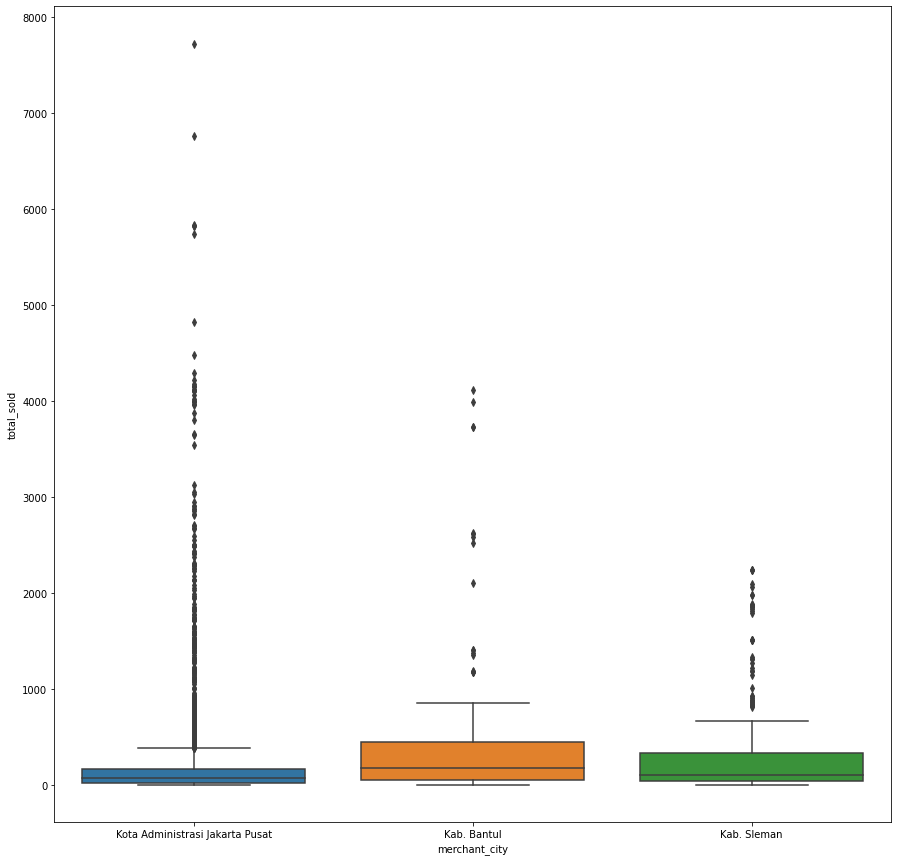

In [29]:
city=['Kota Administrasi Jakarta Pusat','Kab. Sleman','Kab. Bantul']
b=data[data['merchant_city'].isin(city)]
plt.figure(figsize=(15,15))
boxplot=sns.boxplot(x="merchant_city", y="total_sold", data=b)
print(boxplot)

In [30]:
from scipy.stats import ttest_ind
import numpy as np
samsung= data[data['product_type']=='Samsung Galaxy A10s']['total_sold']
xiaomi2= data[data['product_type']=='Xiaomi Redmi 6A']['total_sold']

samsung_mean=np.mean(samsung)
xiaomi2_mean=np.mean(xiaomi2)

print("Rata - rata penjualan Samsung Galaxy A10s : ",samsung_mean)
print("Rata - rata penjualan Xiaomi Redmi 6A : ",xiaomi2_mean)

samsung_std=np.std(samsung)
xiaomi2_std=np.std(xiaomi2)

print("Standard Deviasi Samsung Galaxy A10s : ",samsung_std)
print("Standard Deviasi Xiaomi Redmi 6A : ",xiaomi2_std)

ttest,pval = ttest_ind(samsung,xiaomi2)
print("p-value", pval)

Rata - rata penjualan Samsung Galaxy A10s :  495.1525423728813
Rata - rata penjualan Xiaomi Redmi 6A :  445.0147255689424
Standard Deviasi Samsung Galaxy A10s :  626.3434790554674
Standard Deviasi Xiaomi Redmi 6A :  580.394664272472
p-value 0.08442284533312362
